In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

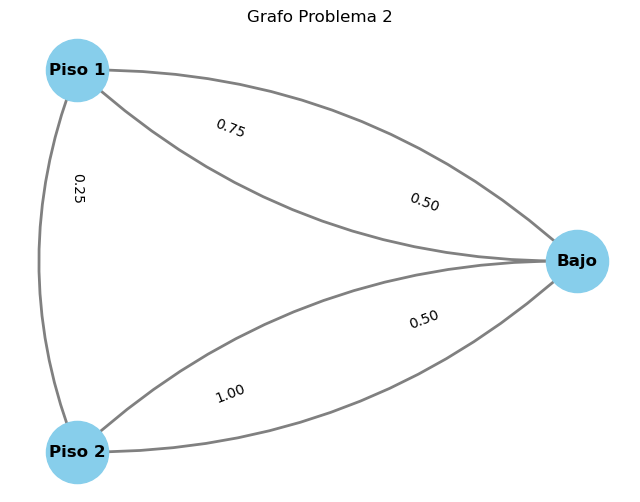

In [13]:
# Define the matrix A with the node labels "Bajo", "Piso 1", "Piso 2"
A = np.array([[0, 0.50, 0.50],
              [0.75, 0, 0.25],
              [1.00, 0, 0]])

# Create a graph from the adjacency matrix A
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Define custom node labels
node_labels = {0: "Bajo", 1: "Piso 1", 2: "Piso 2"}

# Draw the graph with enhanced arrow properties for visibility
plt.figure(figsize=(8, 6))

# Use circular layout instead of spring layout for better visualization of bidirectional edges
pos = nx.circular_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=2000)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight="bold")

# Draw edges with curved arrows for bidirectional relationships
for (u, v) in G.edges():
    # Draw edges with arrows
    edge_color = 'gray'
    connectionstyle = "arc3,rad=0.2"  # Curved edges
    
    # Only draw edges where weight > 0
    if A[u, v] > 0:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], 
                             edge_color=edge_color, 
                             connectionstyle=connectionstyle,
                             arrowsize=20, width=2)

# Add edge labels with adjusted positions for curved edges
edge_labels = {}
for (u, v) in G.edges():
    if A[u, v] > 0:
        edge_labels[(u, v)] = f"{A[u, v]:.2f}"

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                           label_pos=0.3,  # Adjust label position along edge
                           font_size=10)

plt.title("Grafo Problema 2")
# Remove axis
plt.axis('off')
plt.show()